# Predicting House Rent in Delhi: An Introduction

Accurate prediction of house rent is important for home owners as well for prospective renters. Rent prediction is complicated because of its dependance and weightage on different parameters and data scientists are constantly providing improved solutions. This proves to be an interesting problem and I wanted to develop a model to predict house rent in my home city, Delhi.

India's housing market is already quite weak and worsening due to Covid-19. It would be interesting to run this model post-pandemic to see how the market improves. Personally, as I would be going back to India after my undergraduate degree, I wish to continue living independantly so this model would be interesting to find rent prices in certain locations and hopefully to find the ideal house.

# Importing relevant libraries

For this project, various libraries are used throughout the project cycle

In [2]:
#Basic Libraries
import pandas as pd
import numpy as np

#Beautiful Soup library, which will be used for data scrapping
from bs4 import BeautifulSoup 
import requests
import time
from requests import get
from random import seed
from random import random
from random import randint

#geopy used to get location information 
import geopy
import geopandas
import geopy.geocoders
import geopy.distance
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

#gmaps, seaborn and matplotlib is used for data visualization
import gmaps 
import seaborn as sb
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

#sklearn is used for data analysis
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 1) Data Acquisition

This is the data scraper to acquire data from https://www.makaan.com, a popular website for discovering, renting, buying, selling and financing a home in India. I use the the website to scrape 4000 data points for properties in Delhi. As the pages are not sorted randomely (but according to relevance), the website is scraped every 8 pages in an effort to acquire all valuable and diverse data. The runtime is large for certain parts of the code, so only 4000 data points are scraped for efficiency. 

In [3]:
# initialize a list called houses 
houses = []
# create list of pages to traverse as information is sorted according to relevance, so we might leave out valuable data if we only traverse first several pages 
pagelist=np.linspace(1,1651,201)
numbers = [ int(x) for x in pagelist ]
count = 1
i=0
# While loop that will run 200 times, to get 200 x 20= 4000 data points
while count <= 200:
    #traverse all pages in list using this url template
        url = 'https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=' + str(numbers[i+1])
    # request response
        response = get(url)
    # parse through html 
        html_soup = BeautifulSoup(response.text, 'html.parser')
    # in the html of the page, find all the bins with <li> and class cardholder:
        house_data = html_soup.find_all('li', class_="cardholder")
    # Print URL to see if there are any errors
        print(url)
        i+=1
    
    # if response is not empty and there is data to scrape
        if house_data != []:
        # add to the list houses
            houses.extend(house_data)
        # random wait times
            value = random()
            scaled_value = 1 + (value * (9 - 5))
            print(scaled_value)
            time.sleep(scaled_value)
        
    # if response is empty
        else:
            print('no data')
            break
            
        count += 1

# prints total data points acquired   
print("Number of data points:",len(houses))

https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=9
4.39063965358616
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=17
2.880712618051278
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=25
1.4326792928342682
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=34
2.3607008400596246
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=42
1.3413638265318886
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=50
2.428263931189721
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delh

https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=454
1.9987676125514713
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=463
4.414131955345773
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=471
3.9949841264837516
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=479
2.557770398043153
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=487
1.2552850932813344
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=496
2.3876964332282897
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&city

https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=900
4.593664027278684
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=908
4.068842771791375
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=916
4.166227809452746
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=925
3.0103732674864974
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=933
1.5363283081501562
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=941
1.045400313979978
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityNa

https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=1337
2.2105336553590877
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=1345
2.1629214697990915
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=1354
2.4797796470768048
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=1362
3.500764408750706
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=1370
1.7652645578031936
https://www.makaan.com/listings?listingType=rent&pageType=CITY_URLS&cityName=Delhi&cityId=6&templateId=MAKAAN_CITY_LISTING_BUY&page=1378
4.5469960933069995
https://www.makaan.com/listings?listingType=rent&pageType=CITY_UR

Variables like house price, area and status (unfurnished, semi-furnished or furnished) are arranged in a hidden data table so this method is used to acquire table data from all data bins.
Variables like number of bathrooms, bedrooms, apartment style and location are also extracted but are not available for all bins so try/except loops are executed to avoid running into error. All data not available is set to 'NA'. Notably, there is a lot of missing information on number of bedrooms.

In [4]:

# initializing lists and variables
count = 0
house_price = []
status = []
area = []
n = int(len(houses)) - 1
data=[]

# running the loop through each html bin scraped
while count <= n:
    num = houses[count]
    table = num.find('table', attrs={'class':'listing-highlights'})
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    # adding data first to a list and creating dataframes for each variable
    price=data[1][0]
    house_price.append(price)
    df_price = pd.DataFrame({'House Price':house_price})
    area.append(data[2][0])
    df_area = pd.DataFrame({'Area':area})
    status.append(data[3][0])
    df_stat = pd.DataFrame({'Status':status})
    data.clear()
    count+=1

print(house_price)
print(area)
print(status)

['17,000', '27,000', '75,000', '23,000', '14,000', '17,000', '12,000', '24,000', '17,000', '16,000', '90,000', '23,000', '19,000', '26,000', '28,000', '25,000', '35,000', '4.5 L', '30,000', '22,000', '30,000', '22,100', '75,000', '40,000', '90,000', '30,000', '85,000', '18,000', '31,000', '25,000', '23,500', '42,000', '48,000', '22,000', '19,000', '27,200', '40,000', '68,000', '55,000', '65,000', '8,500', '16,500', '14,000', '20,000', '12,000', '15,000', '12,500', '17,000', '45,000', '40,000', '45,000', '35,000', '40,000', '50,000', '95,000', '45,000', '35,000', '35,000', '40,000', '40,000', '33,000', '25,000', '18,000', '85,000', '26,000', '26,000', '28,000', '24,000', '42,000', '23,000', '25,000', '23,000', '26,000', '25,000', '30,000', '32,000', '27,000', '27,000', '26,000', '31,000', '3.75 L', '4 L', '45,000', '7,500', '29,000', '21,000', '30,000', '28,000', '25,000', '24,000', '30,000', '27,000', '28,000', '27,000', '26,000', '30,000', '30,000', '28,000', '32,000', '27,000', '25,0

In [5]:
count = 0
bathroom=[]
bedroom=[]
aparttype=[]
location=[] 
n = int(len(houses)) - 1
data=[]

while count <= n:
    num = houses[count]
    # find number of bathrooms if data is available
    try:
        br = num.find('li', attrs={"class": "keypoint","title":"bathrooms"}).text
        br=br[0]
    except AttributeError:
        br='NA'
    bathroom.append(br)
    df_bathroom = pd.DataFrame({'No. of Bathrooms':bathroom})
    # find number of bedrooms if data is available and the apartment type
    try:
        bedroomnum = num.find('h3', attrs={"class": "seo-hdng"}).text
        bedroomnum1=bedroomnum[0]
    except AttributeError:
        bedroomnum1='NA'
    bedroom.append(bedroomnum1)
    df_bedroom = pd.DataFrame({'No. of Bedrooms':bedroom})
    style=bedroomnum[2:5]
    aparttype.append(style)
    df_aparttype = pd.DataFrame({'Apartment Type':aparttype})
    # find location
    location1 = num.find('span', attrs={"itemprop": "addressLocality"}).text
    location.append(location1)
    df_location = pd.DataFrame({'Location':location})
    count+=1


print(bathroom)
print(bedroom)
print(aparttype)
print(location)


['1', '3', '3', '3', '1', 'NA', '1', '3', '2', '2', '4', '1', '2', '2', '3', '2', '4', '5', '3', '2', 'NA', '2', '3', '2', '4', '1', 'NA', '1', '2', '1', '2', '3', '4', '1', '1', '2', '3', '3', '3', '3', '1', '2', '2', '2', '2', '2', '1', '2', '3', '3', '3', '2', '2', '4', '5', '2', '1', '2', '3', '3', '2', '2', '1', '3', '2', '2', 'NA', '2', '3', '3', '2', '2', '3', '3', '3', '3', '3', '2', '2', '3', '5', '6', '3', '1', '2', '2', '2', 'NA', '2', '2', '3', '2', 'NA', '2', '2', '3', '3', '2', '3', '2', '2', '2', '2', '3', '1', '3', '3', '1', '1', '2', '3', '4', '4', '3', '3', '3', '3', '3', '2', '4', '1', '2', '2', '2', '2', '2', '1', '1', '1', 'NA', 'NA', '1', '2', '2', '2', '1', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '2', '5', '4', '2', '2', '2', '2', '2', '2', '2', '2', '3', '2', '1', '1', '1', '2', '2', '1', '1', '1', 'NA', '1', 'NA', '2', '2', 'NA', 'NA', '2', '2', '3', '1', '1', '2', '2', '2', '2', '4', '2', '2', '2', '2', '3', '3', '1', '3', '2', '1', '2', '1

Data processing: Now that all data is scrapped, location is used to find the latitude and longitude coordinates using Nominatim and geocode. This is then compared to one location, called Shanti Niketan, which is known in Delhi for being an expensive and posh residential area. Other high rent areas are also close to this location so the distance of each data point is compared to this unique location to see if there is any correlation with house price. There are several methods to take the distance. The code uses geodesic, which is the shortest path between 2 points on a curved surface. Runtime for this code is quite long (20 mins)

In [6]:
#Find latitude and longitude of each location
geolocator = Nominatim(user_agent="my_user_agent")
latitude=[]
longitude=[]
count=0
xx='NA'
while count <= n:
    address=location[count]
    city ="Delhi"
    loc = geolocator.geocode(address+','+ city)
    #if geolocator is not able to find or finds the location in another part of the world, put NA
    if loc is None or loc.latitude<27:
        latitude.append(xx)
        longitude.append(xx)
    else:
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    count+=1
    df_lat = pd.DataFrame({'Latitude':latitude})
    df_long = pd.DataFrame({'Longitude':longitude})
print(latitude)
print(longitude)

#Find distance of all data points from one unique location if the latitude coordinates for it are available
count=0
distance=[]
n = int(len(df_lat)) - 1
latcoord=28.5779
longcoord=77.1694
coord1=(latcoord,longcoord)
while count<=n:
    if df_lat['Latitude'][count]!='NA':
        coord2=(str(df_lat['Latitude'][count]),str(df_long['Longitude'][count]))
        dist = geodesic(coord1,coord2).km
        distance.append(dist)
        df_distance= pd.DataFrame({'Distance':distance})
        count+=1
    else:
        distance.append('NA')
        df_distance= pd.DataFrame({'Distance':distance})
        count+=1
print(distance)

[28.5339201, 28.5244107, 28.5668357, 28.5244107, 28.5368964, 28.5368964, 28.5244107, 28.5244107, 28.5244107, 28.5244107, 28.6385903, 28.557032200000002, 28.5244107, 28.5244107, 28.5244107, 28.60768035, 28.5244107, 28.5785457, 28.5244107, 28.5956058, 28.637853, 28.5339201, 28.5374783, 28.5579591, 28.5339201, 28.637853, 28.637853, 28.5339201, 28.5339201, 28.5656419, 28.5339201, 28.5757718, 28.58955135, 28.637853, 28.5339201, 28.5339201, 28.5843113, 28.5339201, 28.5956058, 'NA', 28.4971399, 28.5711087, 28.5711087, 28.5711087, 28.5711087, 28.5711087, 28.5711087, 28.5711087, 28.557032200000002, 28.557032200000002, 28.557032200000002, 28.557032200000002, 28.557032200000002, 28.557032200000002, 28.5512676, 28.557032200000002, 28.557032200000002, 28.557032200000002, 28.557032200000002, 28.557032200000002, 28.5339201, 28.5339201, 28.5339201, 28.5374783, 28.5619923, 28.5925436, 28.5843113, 28.6017004, 28.5874118, 28.5917057, 28.5843113, 28.5790689, 28.5925436, 28.6017004, 28.6017004, 28.6017004,

[6.442165113725477, 7.345540749214799, 5.108045558228055, 7.345540749214799, 6.88357008044271, 6.88357008044271, 7.345540749214799, 7.345540749214799, 7.345540749214799, 7.345540749214799, 14.272819055250931, 7.713924342395441, 7.345540749214799, 7.345540749214799, 7.345540749214799, 12.716133423668264, 7.345540749214799, 0.5462170560843317, 7.345540749214799, 12.515971413999008, 6.868335869409826, 6.442165113725477, 5.504588973735251, 11.114602896413357, 6.442165113725477, 6.868335869409826, 6.868335869409826, 6.442165113725477, 6.442165113725477, 2.7160319604770096, 6.442165113725477, 11.809633427947421, 11.751842425256418, 6.868335869409826, 6.442165113725477, 6.442165113725477, 10.951249455865117, 6.442165113725477, 12.515971413999008, 'NA', 9.025326173959007, 9.4520892439991, 9.4520892439991, 9.4520892439991, 9.4520892439991, 9.4520892439991, 9.4520892439991, 9.4520892439991, 7.713924342395441, 7.713924342395441, 7.713924342395441, 7.713924342395441, 7.713924342395441, 7.713924342

# 2) Data Cleaning

Data needs to be cleaned in the following ways:

1) Removing commas and converting string to float for numerical data

2) Some house prices have the unit 'L' in it. This is a unit in the Indian numbering system, called Lakh, and represents one hundred thousand. For example, a house price cell containing the value of '1.45 L' will be converted to 1.45 x 100000= '145000'INR.

3) All 'NA' values are dropped after dataframe is created which is important for data analysis but may result is loss of valuable data

In [7]:
n = int(len(houses)) - 1
count=0
#converting lakh to standard units
while count<n:
    if df_price['House Price'].str.contains('L')[count]:
        df_price['House Price'][count]=df_price['House Price'][count].replace('L', '')
        df_price['House Price'][count]=float(df_price['House Price'][count])*100000
        df_price['House Price'][count]=str(df_price['House Price'][count])
        count+=1
    else:
        count+=1
        
#removing commas 
df_price['House Price'] = df_price['House Price'].str.replace(",","")

In [8]:
#Concatinate all dataframes into one, drop NA values and calculate data lost
data = pd.concat([df_location,df_price,df_area,df_stat,df_bedroom,df_bathroom,df_aparttype,df_lat,df_long,df_distance], axis=1)
ilen= len(data)
print("Data points before cleaning:",ilen)
data = data[data != 'NA']
data=data.dropna()
data= data.reset_index(drop=True)
flen= len(data)
print("Data points after cleaning:", flen)
losslen=int(((ilen-flen)/ilen)*100)
print("Percent of data lost in cleaning:", losslen)
data.head(20)

Data points before cleaning: 3980
Data points after cleaning: 2973
Percent of data lost in cleaning: 25


,Location,House Price,Area,Status,No. of Bedrooms,No. of Bathrooms,Apartment Type,Latitude,Longitude,Distance
0,Malviya Nagar,17000,600,Unfurnished,2,1,BHK,28.5339,77.2124,6.44217
1,Saket,27000,1680,Semi-Furnished,3,3,BHK,28.5244,77.2137,7.34554
2,South Extension 2,75000,1800,Semi-Furnished,3,3,BHK,28.5668,77.2201,5.10805
3,Saket,23000,1650,Semi-Furnished,3,3,BHK,28.5244,77.2137,7.34554
4,Sheikh Sarai,14000,500,Semi-Furnished,1,1,BHK,28.5369,77.2222,6.88357
5,Saket,12000,500,Semi-Furnished,1,1,BHK,28.5244,77.2137,7.34554
6,Saket,24000,1630,Semi-Furnished,3,3,BHK,28.5244,77.2137,7.34554
7,Saket,17000,840,Semi-Furnished,2,2,BHK,28.5244,77.2137,7.34554
8,Saket,16000,800,Semi-Furnished,2,2,BHK,28.5244,77.2137,7.34554
9,Panchsheel Enclave,90000,2475,Semi-Furnished,3,4,BHK,28.6386,77.0407,14.2728


In [9]:
#Make all numerical data float type and print dtypes
data['No. of Bathrooms'] = pd.to_numeric(data['No. of Bathrooms'], downcast="float")
data['No. of Bedrooms'] = pd.to_numeric(data['No. of Bedrooms'], downcast="float")
data['House Price'] = pd.to_numeric(data['House Price'], downcast="float")
data['Area'] = pd.to_numeric(data['Area'], downcast="float")
data['Distance'] = pd.to_numeric(data['Distance'], downcast="float")
print("Data type : ", type(data))
print("Data dims : ", data.shape)
print(data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2973, 10)
Location             object
House Price         float32
Area                float32
Status               object
No. of Bedrooms     float32
No. of Bathrooms    float32
Apartment Type       object
Latitude             object
Longitude            object
Distance            float32
dtype: object


# 3) Data Visualization

A good way to visualize the data points would be to display them on google maps (using python's gmaps), to check the distribution and locations of data points, especially with respect to the unique location chosen, which is represnted by heatmap_layer2. This requires a unique API key to be able to securely connect to Google Maps's API platform. To keep it private, it is secured in a .txt file. 

In [16]:
datamap= pd.concat([data['Latitude'],data['Longitude'],data['House Price']], axis=1)
api_file=open("api_key_maps.txt","r")
api_key=api_file.read()
api_file.close()
gmaps.configure(api_key=api_key)
fig = gmaps.figure()
heatmap_layer1 = gmaps.heatmap_layer(
    datamap[['Latitude','Longitude']],
    weights=datamap['House Price'],
    max_intensity = 1000,
    point_radius=4.0,
)

heatmap_layer2 = gmaps.heatmap_layer([(28.5779,77.1694)])

fig.add_layer(heatmap_layer1)
fig.add_layer(heatmap_layer2)
fig

Figure(layout=FigureLayout(height='420px'))

Other visualizations such as pair plots, box plots, heatmaps, countplots and jointplots are used to visualize data

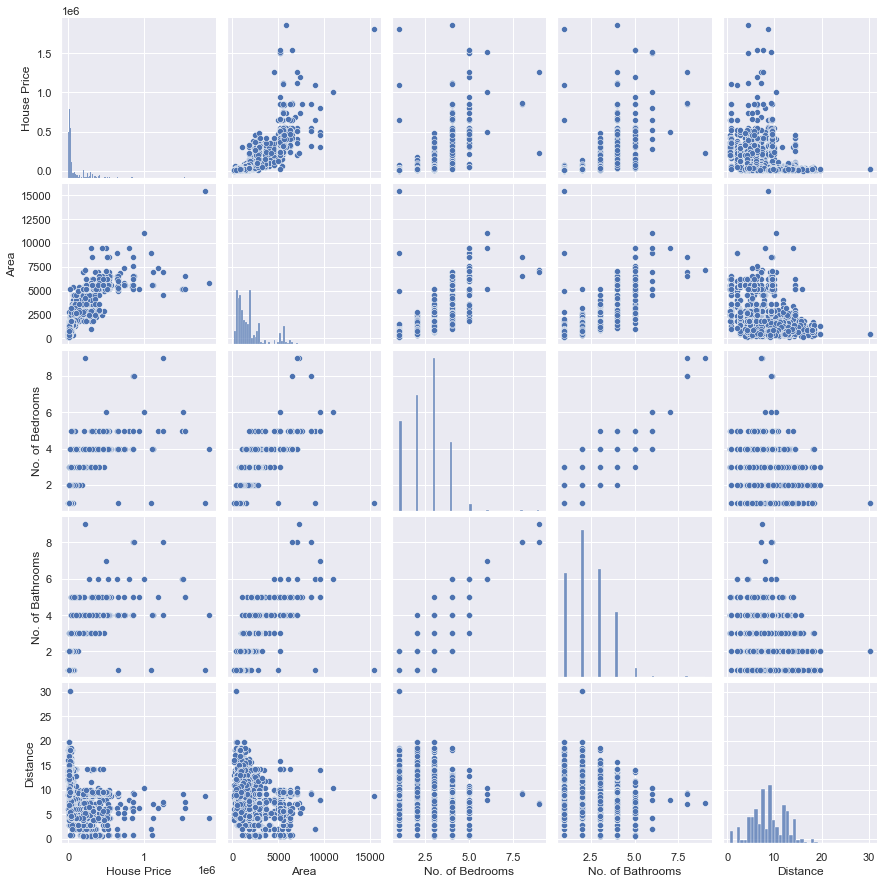

In [17]:
# Create new dataframe only containing numeric data
datanumeric= data.copy()
datanumeric=datanumeric.drop(['Latitude','Longitude','Status'], axis = 1)
sb.set() 
# Make Pairplot
sb.pairplot(data = datanumeric)

In [18]:
#to get insight into means and distribution of all numeric variables
datanumeric.describe()

,House Price,Area,No. of Bedrooms,No. of Bathrooms,Distance
count,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000
mean,9.300711e+04,1858.796509,2.521359,2.391860,8.862909
std,1.609862e+05,1628.089233,1.064522,1.107676,3.688188
min,3.000000e+03,150.000000,1.000000,1.000000,0.546217
25%,1.600000e+04,750.000000,2.000000,2.000000,6.442165
50%,3.000000e+04,1350.000000,3.000000,2.000000,9.025326
75%,7.000000e+04,2250.000000,3.000000,3.000000,11.844990
max,1.859000e+06,15412.000000,9.000000,9.000000,30.301119


<AxesSubplot:>

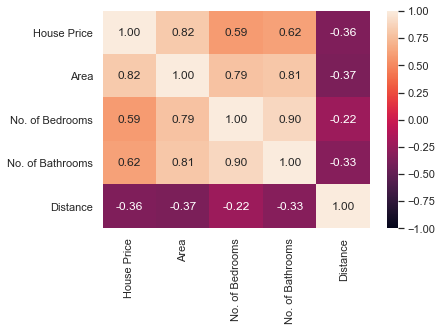

In [19]:
#Creating heatmap and generating correlation coefficients
sb.heatmap(datanumeric.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Text(0.5, 1.0, 'Number of Bathrooms vs. House Price')

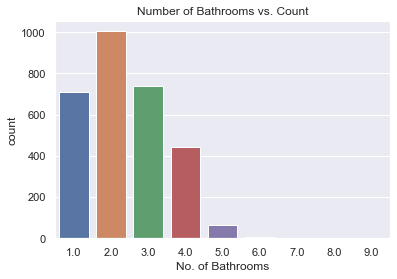

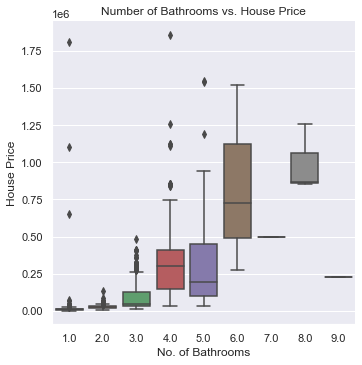

In [20]:
#Creating countplot and box plot for number of bathrooms vs. price
sb.countplot(x=datanumeric["No. of Bathrooms"])
plt.title('Number of Bathrooms vs. Count')
sb.catplot(x='No. of Bathrooms', y='House Price', kind="box", data=datanumeric)
plt.title('Number of Bathrooms vs. House Price')

Text(0.5, 1.0, 'Number of Bedrooms vs. House Price')

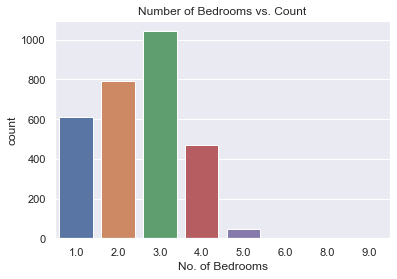

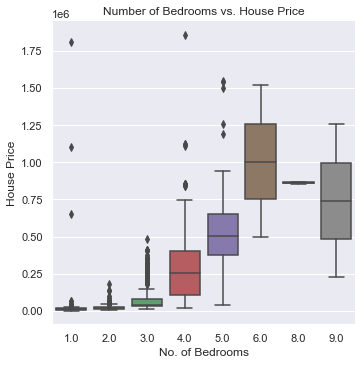

In [21]:
#Creating countplot and box plot for number of bedrooms vs. price
sb.countplot(x=datanumeric["No. of Bedrooms"])
plt.title('Number of Bedrooms vs. Count')
sb.catplot(x='No. of Bedrooms', y='House Price', kind="box", data=datanumeric)
plt.title('Number of Bedrooms vs. House Price')

Text(0.5, 1.0, 'Furnished Status vs. House Price')

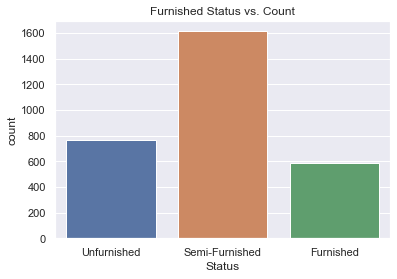

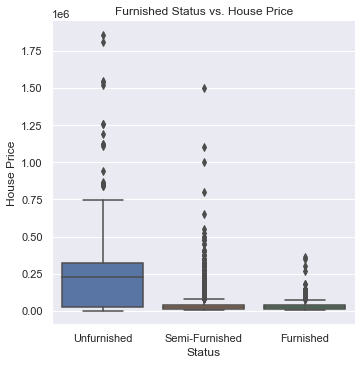

In [22]:
#Creating countplot and bloxplot of different status and relation with price
sb.countplot(x=data["Status"])
plt.title('Furnished Status vs. Count')
sb.catplot(x='Status', y='House Price', kind="box", data=data)
plt.title('Furnished Status vs. House Price')

Text(0.5, 1.0, 'Apartment type vs. Count')

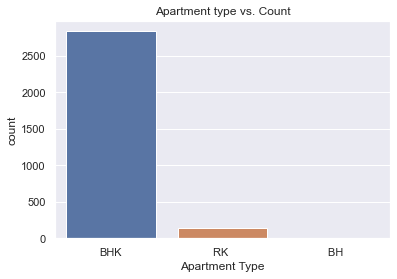

In [23]:
#Creating countplot for apartment type
sb.countplot(x=data["Apartment Type"])
plt.title('Apartment type vs. Count')

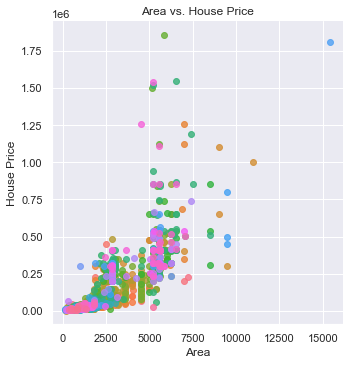

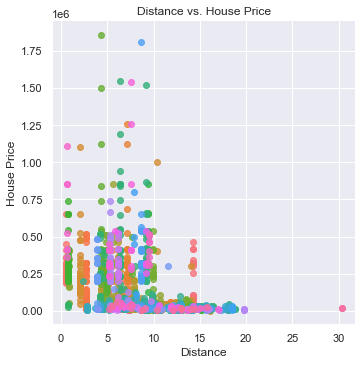

In [24]:
#Scatter plots of are and distance vs house price, coloured according to location 
sb.lmplot( x="Area", y="House Price", data=datanumeric, fit_reg=False, hue='Location', legend=False)
plt.title('Area vs. House Price')
sb.lmplot( x="Distance", y="House Price", data=datanumeric, fit_reg=False, hue='Location', legend=False)
plt.title('Distance vs. House Price')
plt.show()

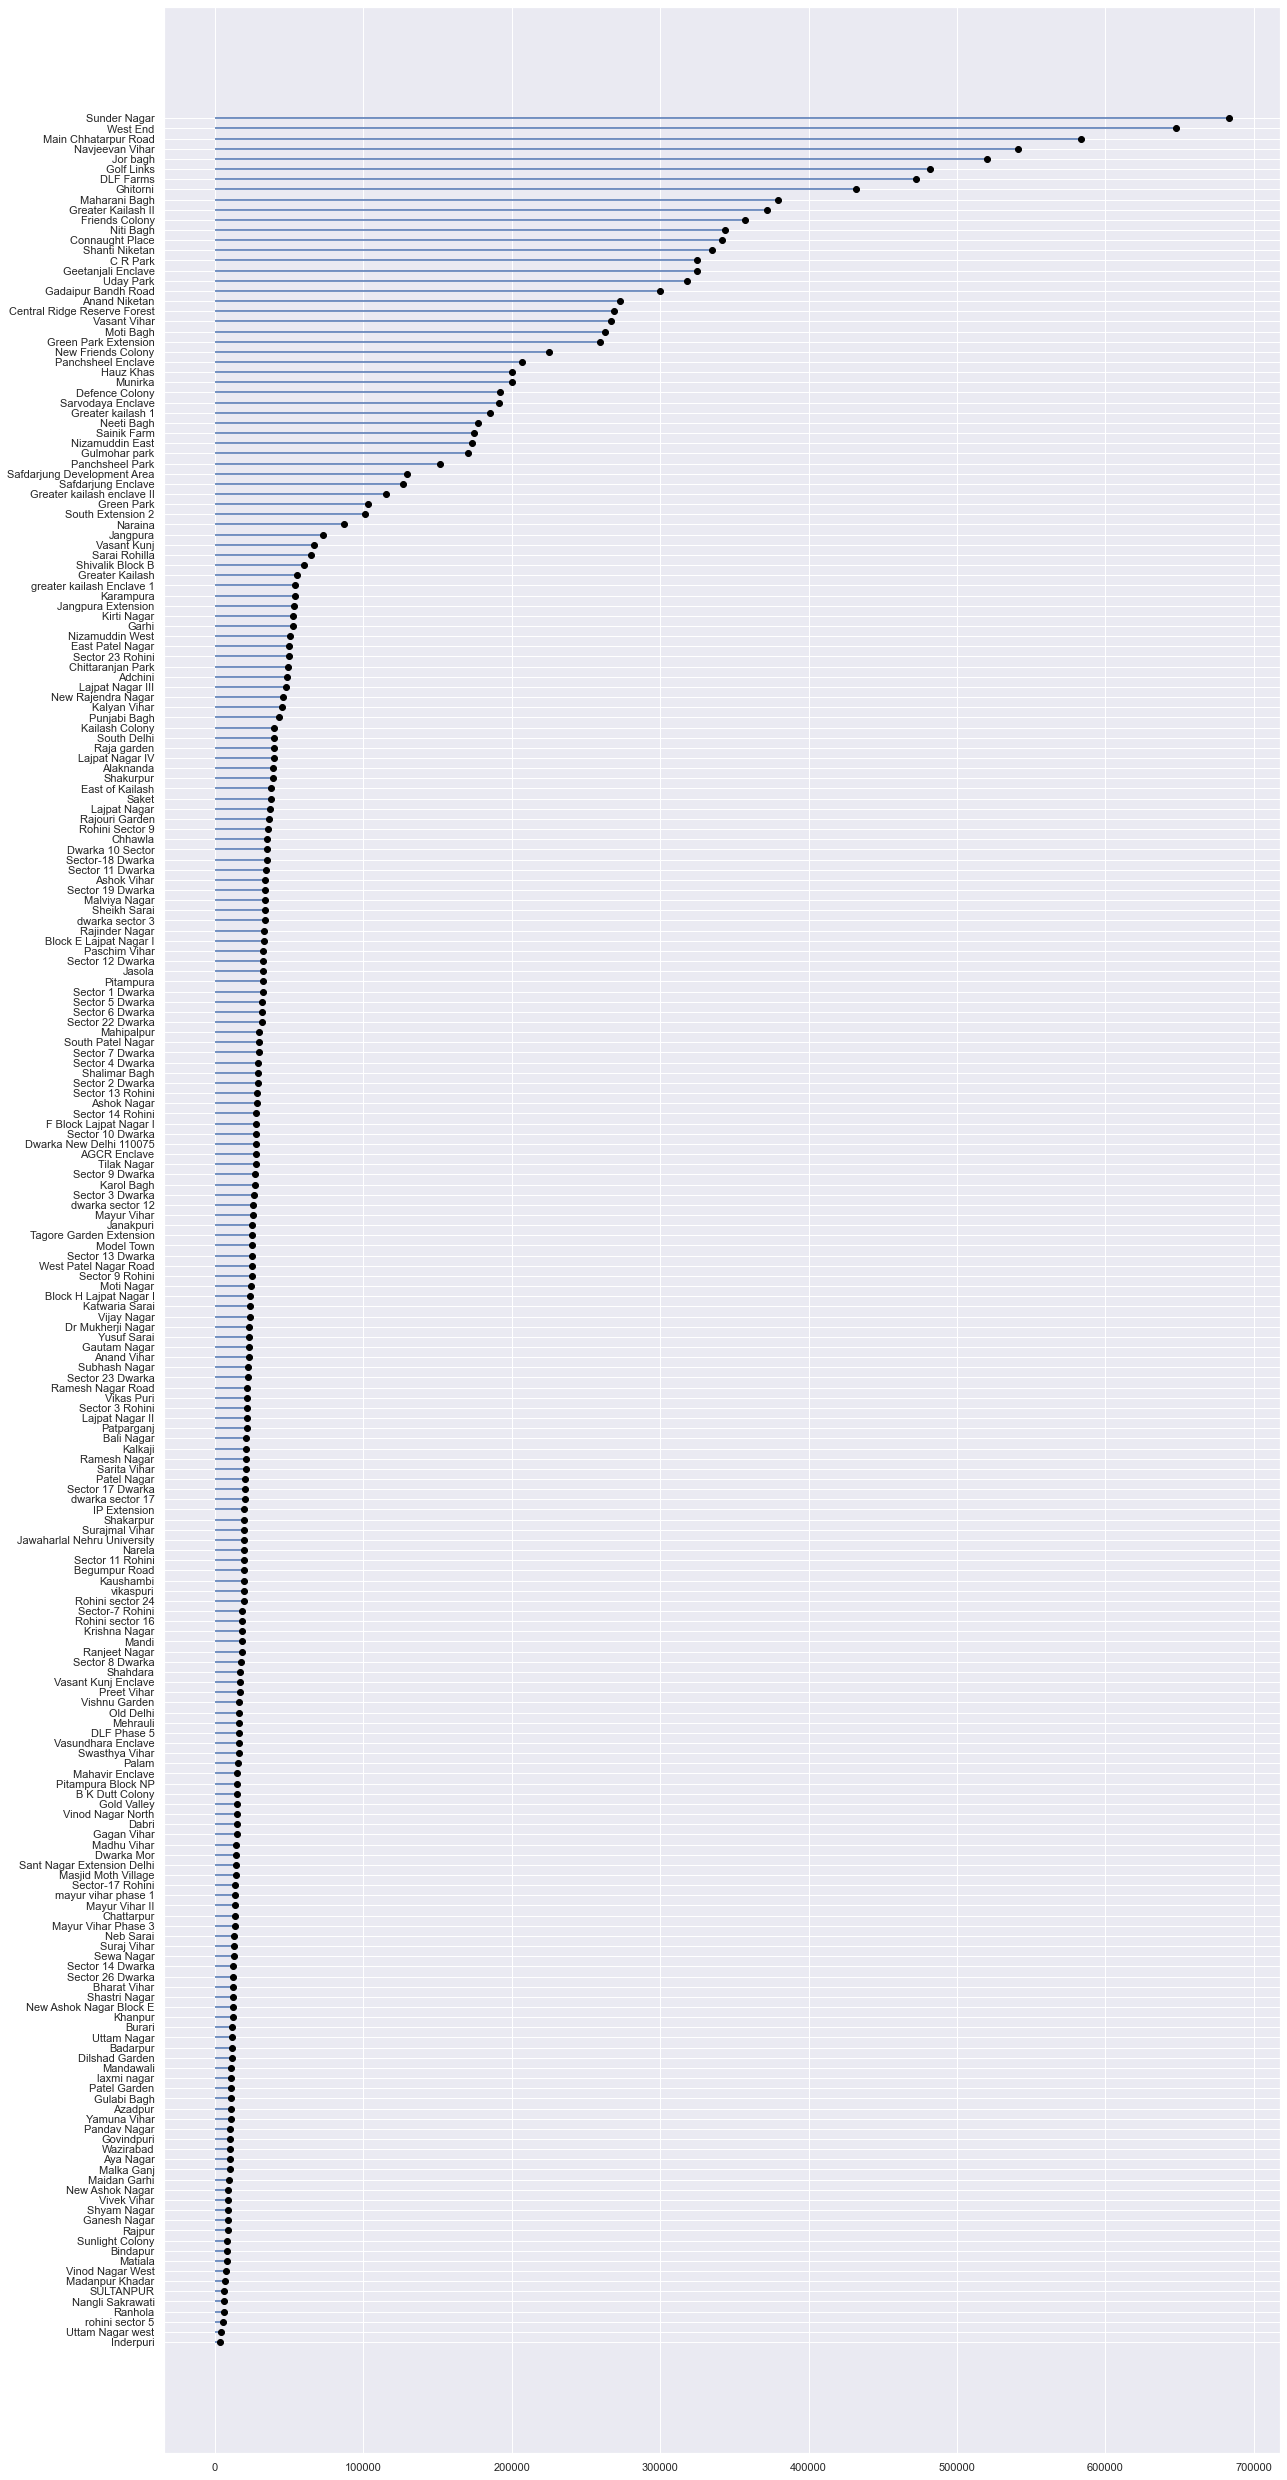

In [25]:
#Plotting a lollipop plot of location against mean house price
locgroup = pd.DataFrame(data.groupby('Location')['House Price'].mean())
locgroup=locgroup.reset_index()
ordered_df = locgroup.sort_values(by='House Price')
ordered_df=ordered_df.reset_index(drop=True)
ordered_df
plt.figure(figsize=(20,45))
plt.hlines(ordered_df['Location'], xmin=0, xmax=ordered_df['House Price'])
plt.plot(ordered_df['House Price'], ordered_df['Location'], "o", color='black')
plt.show()


[Text(0, 0, 'Malviya Nagar'),
 Text(1, 0, 'Saket'),
 Text(2, 0, 'South Extension 2'),
 Text(3, 0, 'Sheikh Sarai'),
 Text(4, 0, 'Panchsheel Enclave'),
 Text(5, 0, 'East of Kailash'),
 Text(6, 0, 'Sector 3 Dwarka'),
 Text(7, 0, 'Anand Niketan'),
 Text(8, 0, 'Sector 12 Dwarka'),
 Text(9, 0, 'Sarvodaya Enclave'),
 Text(10, 0, 'Sector 22 Dwarka'),
 Text(11, 0, 'Rajinder Nagar'),
 Text(12, 0, 'Safdarjung Enclave'),
 Text(13, 0, 'Sector 19 Dwarka'),
 Text(14, 0, 'Sector 11 Dwarka'),
 Text(15, 0, 'Sector 10 Dwarka'),
 Text(16, 0, 'Chattarpur'),
 Text(17, 0, 'Sector 8 Dwarka'),
 Text(18, 0, 'Greater kailash 1'),
 Text(19, 0, 'Sector 23 Dwarka'),
 Text(20, 0, 'Sector 6 Dwarka'),
 Text(21, 0, 'Sector 4 Dwarka'),
 Text(22, 0, 'Sector 7 Dwarka'),
 Text(23, 0, 'dwarka sector 17'),
 Text(24, 0, 'Sector 9 Dwarka'),
 Text(25, 0, 'Vasant Vihar'),
 Text(26, 0, 'DLF Farms'),
 Text(27, 0, 'Pitampura'),
 Text(28, 0, 'rohini sector 5'),
 Text(29, 0, 'Ashok Vihar'),
 Text(30, 0, 'Model Town'),
 Text(31, 0, 'S

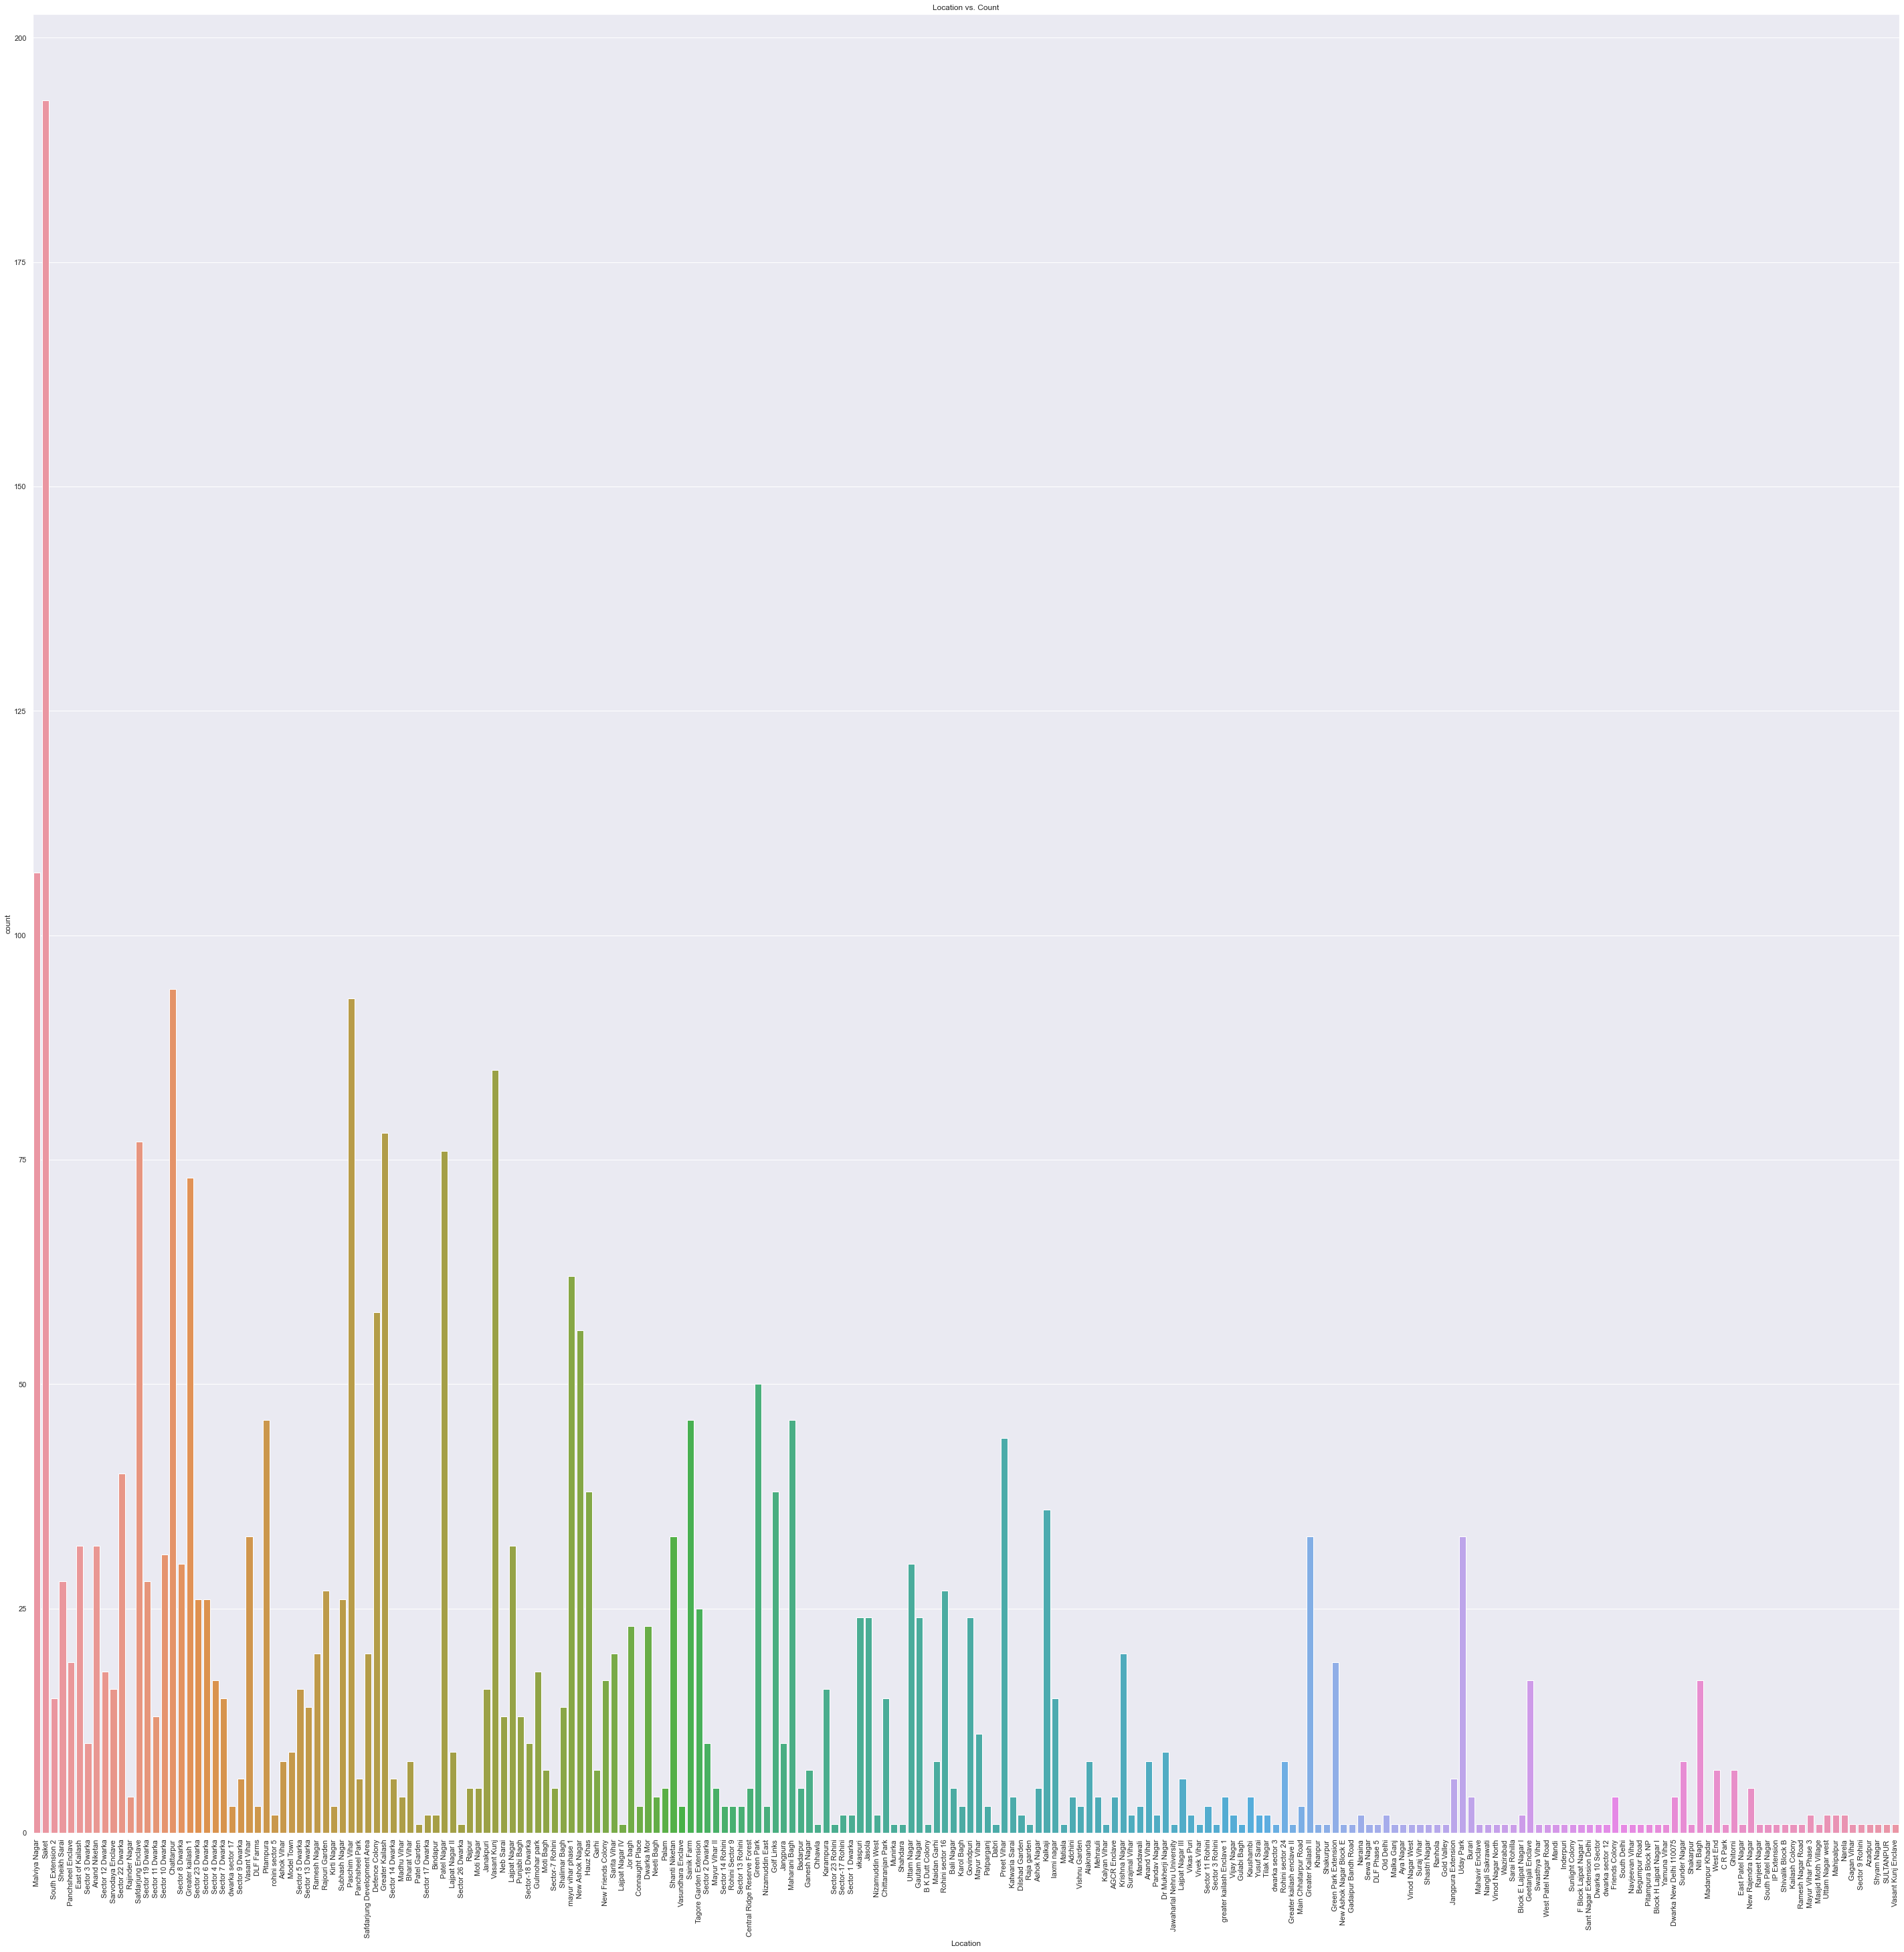

In [26]:
#Plotting a count plot of location to see the distribution 
plt.figure(figsize=(50,50))
locplot=sb.countplot(x=data["Location"])
locplot
plt.title('Location vs. Count')
locplot.set_xticklabels(locplot.get_xticklabels(), rotation=90)

# 4) Data Pre-processing 

Z-scoring is used to normalize data. This is the difference of all data points from the mean, divided by the standard deviation. Z-scoring is used to bring all the data to about the same range so all data, very big or very small, can be used in analysis without being treated as anomalies. 

In [27]:
datafinal=data.drop(['Location','Latitude','Longitude','Apartment Type'], axis = 1)
data_ohe=datafinal.copy()
data_=datafinal.drop(['Status'], axis = 1)
data_x=data_.drop(['House Price'],axis = 1)
data_y=data_['House Price']
meanx=data_x.mean()
stdevx=data_x.std()
data_x_n=(data_x-meanx)/stdevx
meany=data_y.mean()
stdevy=data_y.std()
data_y_n=(data_y-meany)/stdevy

One hot encoding is required for regression and can be used for categorical data such as location and status to assign them an integer number. For example, a status_unfurnished value is 1, status_furnished value of 0 and status_semi-furnished value is 0 indicated that the house is unfurnished. Similarly, this can be done for location to make sense of the data as these categorical data can have a natural relationship to the price that can be missed out on if only numerical data is used. 

In [28]:
statdum = pd.get_dummies(datafinal['Status'], prefix='Status')
locdum = pd.get_dummies(data['Location'],prefix='Location')
data_ohe = pd.concat([data_x, statdum,locdum], axis=1)
data_ohe_n = pd.concat([data_x_n, statdum,locdum], axis=1)
print(data_ohe_n.shape)
data_ohe_n

(2973, 227)


,Area,No. of Bedrooms,No. of Bathrooms,Distance,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,Location_AGCR Enclave,Location_Adchini,Location_Alaknanda,...,Location_Yamuna Vihar,Location_Yusuf Sarai,Location_dwarka sector 12,Location_dwarka sector 17,Location_dwarka sector 3,Location_greater kailash Enclave 1,Location_laxmi nagar,Location_mayur vihar phase 1,Location_rohini sector 5,Location_vikaspuri
0,-0.773174,-0.489759,-1.256559,-0.656363,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.109820,0.449630,0.549023,-0.411425,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.036114,0.449630,0.549023,-1.018091,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.128246,0.449630,0.549023,-0.411425,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.834596,-1.429147,-1.256559,-0.536682,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,-0.650331,-1.429147,-1.256559,-0.026311,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2969,-1.043430,-1.429147,-1.256559,0.044025,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2970,-0.896018,-1.429147,-1.256559,0.044025,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2971,-0.588909,-0.489759,-0.353768,0.212958,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5) Data Analysis

The techniques used for anaysis are:
1) Linear Regression
2) Random Forest
3) Neural Networks 

The data is divided into 25% test and 75% train dataset and these sklearn models are used to fit the train dataset and find the error and accuracy of implementing the model on the test dataset. Each function defined also has 2 non-compulsory arguments which will be used in the later section of the code. One is called 'test' and it is used to predict house price for new data points that are based on the fitted model. The other is called 'cross' and this uses K-fold cross validation and essentially estimates the skill of the model by shuffling the dataset, splitting into k=4 sets, predicting the model by assigning each set as the test dataset once and combining the results.

Linear Regression: The model will try to find a linear relationship between the variables and price. This is the simplest model used in machine learning and may prove to be quite accurate. 

In [29]:
# Defining Mean Square Error
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Linear Regression Model
def linear_reg(xdata,ydata, test=None,cross=1): 
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.25)

    # Check the sample sizes
    print("Train Set Shape :", y_train.shape, X_train.shape)
    print("Test Set Shape :", y_test.shape, X_test.shape)

    # Linear Regression using Train Data
    linreg_all = LinearRegression()         # create the linear regression object
    linreg_all.fit(X_train, y_train)        # train the linear regression model

    y_train_pred = linreg_all.predict(X_train)
    y_test_pred = linreg_all.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Summary statistics\tTrain Dataset:")
    print("Explained Variance (R^2) \t:", linreg_all.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_sq_err(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Summary Statistics \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg_all.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:",mean_sq_err(y_test, y_test_pred))
    print()
    
    # Plots to visualize predicted against true values for test and train data
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
    axes[0].set_xlabel("True values of House Price (Train)")
    axes[0].set_ylabel("Predicted values of House Price (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
    axes[1].set_xlabel("True values of the House Price (Test)")
    axes[1].set_ylabel("Predicted values of House Price (Test)")
    plt.show()
    
    #Non-compulsory: To predict house price for new data points
    if test is not None:
        test_pred=linreg_all.predict(test)
        print("Predicted House Price is:",test_pred)
    else:
        print("no test")
        
    #Non-compulsory: K-fold cross validation
    if cross==1:
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        score= cross_val_score(linreg_all,xdata, ydata, cv=cv,scoring='r2')
        print('Cross Validation:')
        print('R_squared values:', score)
        print('R_squared mean:', score.mean())
        print("\n")
    else:
        print("No cross validation")
        


Random Forest Regressor: This technique builds multiple decision trees and merges them for a good and stable prediction. The good thing about random forest is that the n_estimators (number of trees) generally does not have an overfitting problem but the computation time will increase as n_estimators increases. For most models, the optimum n_estimator value is lower that 1000, so a while loop is used to iterate over n_estimators up to 1000 and find the optimal n_estimator corresponding to the max accuracy and using it to fit the model. 

In [30]:
# Random Forest Model
def randomforest(xdata, ydata,test=None,cross=1):
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.25)
    print("Train Set Shape :", y_train.shape, X_train.shape)
    print("Test Set Shape :", y_test.shape, X_test.shape)
    y=[]
    x=np.linspace(1,1000,20)
    x = [int(i) for i in x]
    n= len(x)
    count=0
    count1=0
    #Plot graph of number of iterations vs. accuracy and find number of iterations for which accuracy is max
    while count<n:
        variable = RandomForestRegressor(n_estimators=x[count])
        number= variable.fit(X_train, y_train)
        score= variable.score(X_test,y_test)
        y.append(score)
        if score==max(y):
            count1=count
        count+=1
    plt.plot(x,y)
    plt.title('Accuracy vs Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.show()
    
    #fit the model with best number of iterations
    forest = RandomForestRegressor(n_estimators=x[count1])
    forest.fit(X_train, y_train)
    print("Random tree with number of iterations:",x[count1])
    print("Accuracy:",forest.score(X_test,y_test))
    
    if test is not None:
        test_pred=forest.predict(test)
        print("Predicted House Price is:",test_pred)
    else:
        print("No test specified")
        
    if cross==1:
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        score= cross_val_score(forest,xdata, ydata, cv=cv,scoring='r2')
        print('Cross Validation:')
        print('R_squared values:', score)
        print('R_squared mean:', score.mean())
        print("\n")
    else:
        print("No cross validation")
    

Neural Networks: The multilayer perceptron is a class of artificial neural networks where data goes through layers of neurons (hidden layers) and predictions are made on outer layer. It also uses a non-linear function approximator. 

In [31]:
# Neural network model

def neural(xdata,ydata,test=None,cross=1): 
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.25)

    # Check the sample sizes
    print("Train Set Shape :", y_train.shape, X_train.shape)
    print("Test Set Shape :", y_test.shape, X_test.shape)

    neural_model = MLPRegressor()
    neural_model.fit(X_train, y_train)
    
    y_train_pred = neural_model.predict(X_train)
    y_test_pred = neural_model.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Summary statistics\tTrain Dataset:")
    print("Explained Variance (R^2) \t:", neural_model.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_sq_err(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Summary Statistics \tTest Dataset")
    print("Explained Variance (R^2) \t:", neural_model.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:",mean_sq_err(y_test, y_test_pred))
    print()
    
    # Plot
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
    axes[0].set_xlabel("True values of House Price (Train)")
    axes[0].set_ylabel("Predicted values of House Price (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
    axes[1].set_xlabel("True values of the House Price (Test)")
    axes[1].set_ylabel("Predicted values of House Price (Test)")
    plt.show()
    
    if test is not None:
        test_pred=neural_model.predict(test)
        print("Predicted House Price is:",test_pred)
    else:
        print("no test")
        
    if cross==1:
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        score= cross_val_score(neural_model,xdata, ydata, cv=cv,scoring='r2')
        print('Cross Validation:')
        print('R_squared values:', score)
        print('R_squared mean:', score.mean())
        print("\n")
    else:
        print("No cross validation")

# 6) Findings

Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)
Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.7135485944917944
Mean Squared Error (MSE) 	: 0.26533666

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: -2771.2397816684247
Mean Squared Error (MSE) 	: 3363.5598



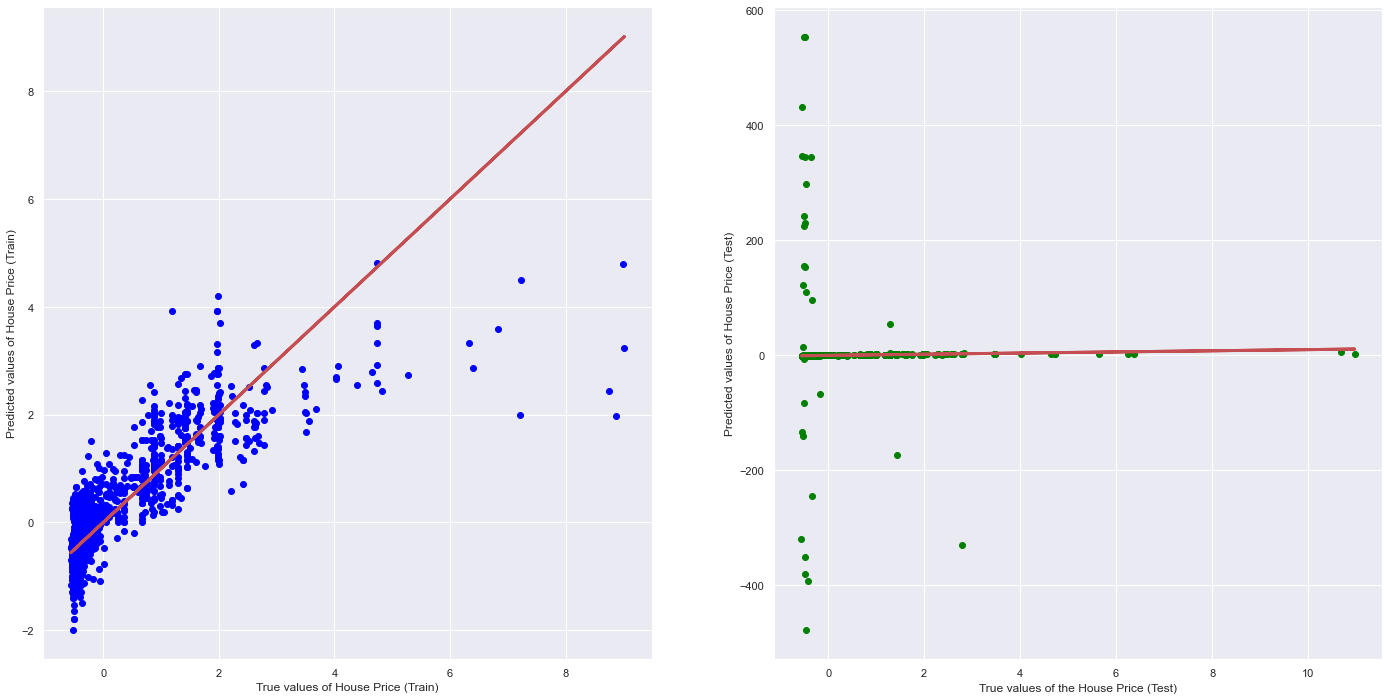

no test
Cross Validation:
R_squared values: [ 7.92442381e-01 -1.08202960e+02 -2.16267312e+01 -6.60683335e+02
 -2.06337958e+00 -2.03215822e+05  6.93650338e-01 -1.54034683e+03
 -3.29842486e+02  3.27439393e-01]
R_squared mean: -20587.677459413775


Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)
Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.7274802018304678
Mean Squared Error (MSE) 	: 6499370500.0

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.5710592749712844
Mean Squared Error (MSE) 	: 13741135000.0



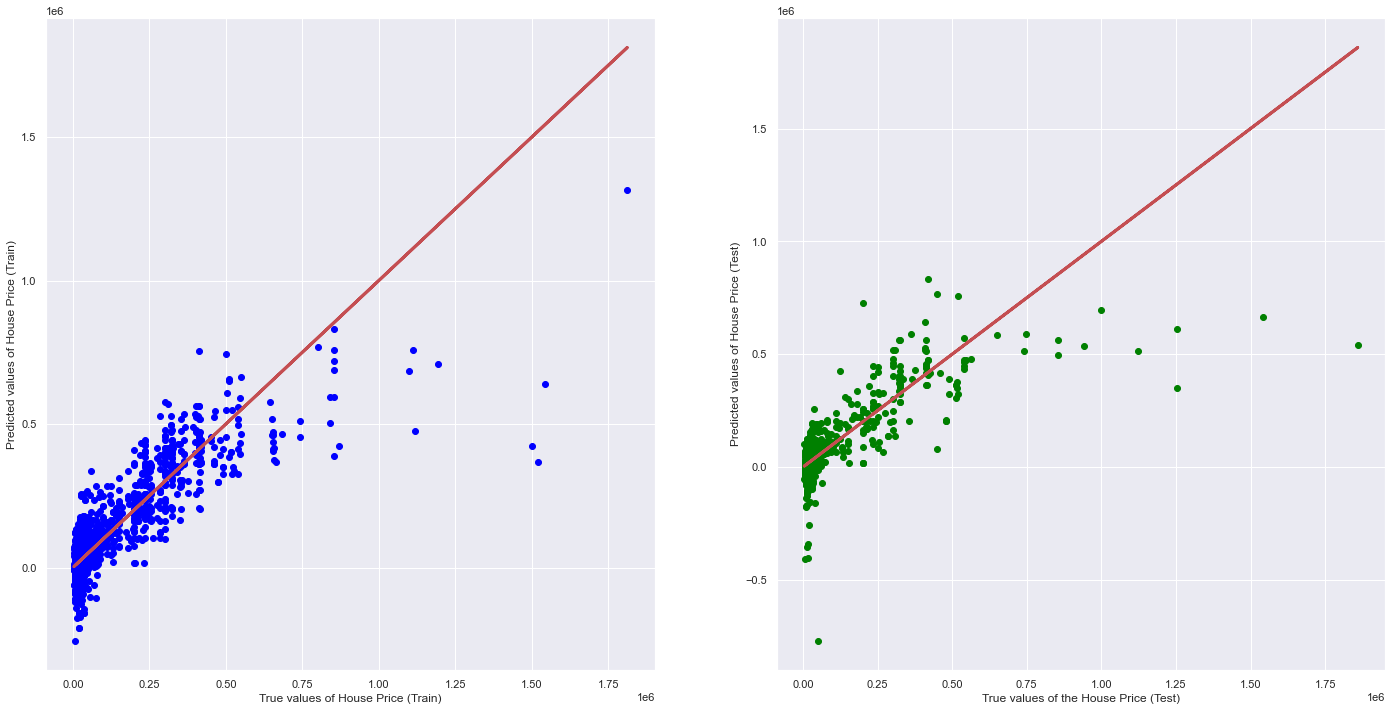

no test
Cross Validation:
R_squared values: [0.79125468 0.81823515 0.69771051 0.68950919 0.80226307 0.64358446
 0.678088   0.78606957 0.8547989  0.79327013]
R_squared mean: 0.7554783658437032


Train Set Shape : (2229,) (2229, 4)
Test Set Shape : (744,) (744, 4)
Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.7126678258354356
Mean Squared Error (MSE) 	: 0.2795537

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.6365079184464675
Mean Squared Error (MSE) 	: 0.39246738



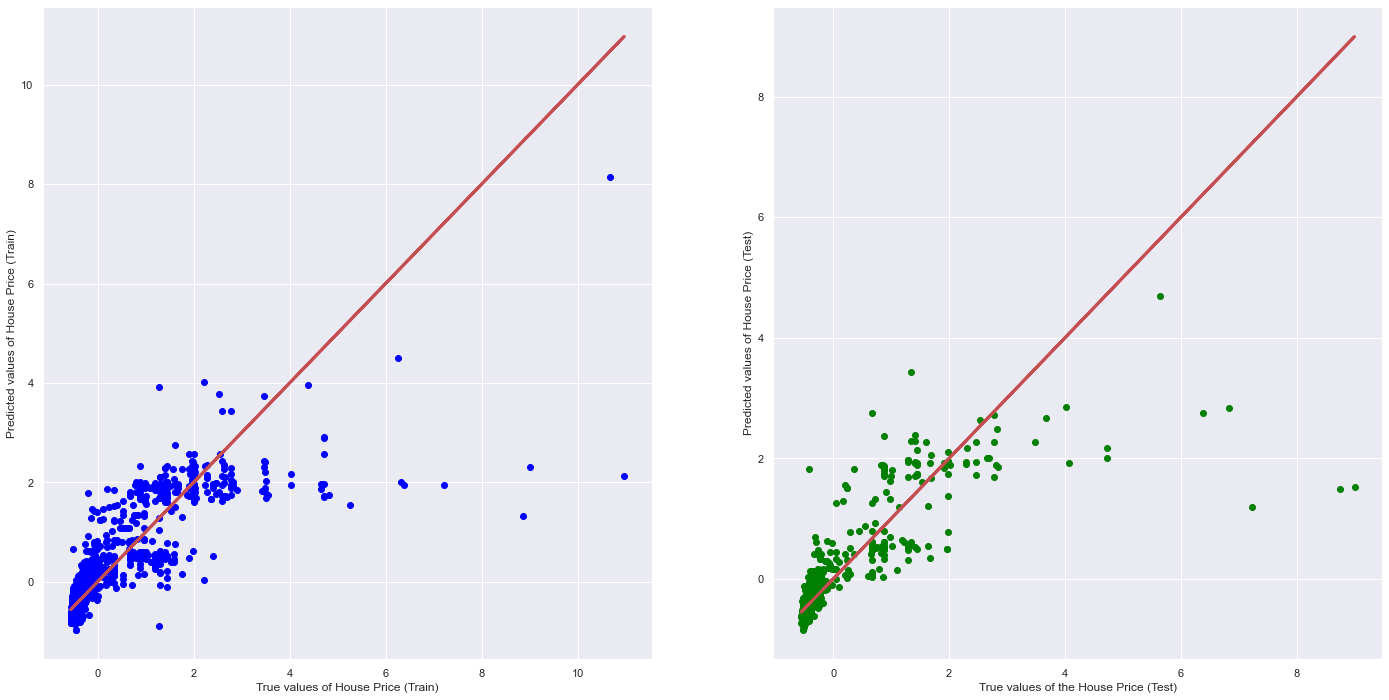

no test
Cross Validation:
R_squared values: [0.78635914 0.78627155 0.62116636 0.59012073 0.66703793 0.63349993
 0.65722601 0.74700301 0.81534477 0.69752071]
R_squared mean: 0.7001550128381234


Train Set Shape : (2229,) (2229, 4)
Test Set Shape : (744,) (744, 4)
Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.6901773527936597
Mean Squared Error (MSE) 	: 8195060000.0

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.6982127707553929
Mean Squared Error (MSE) 	: 7308719000.0



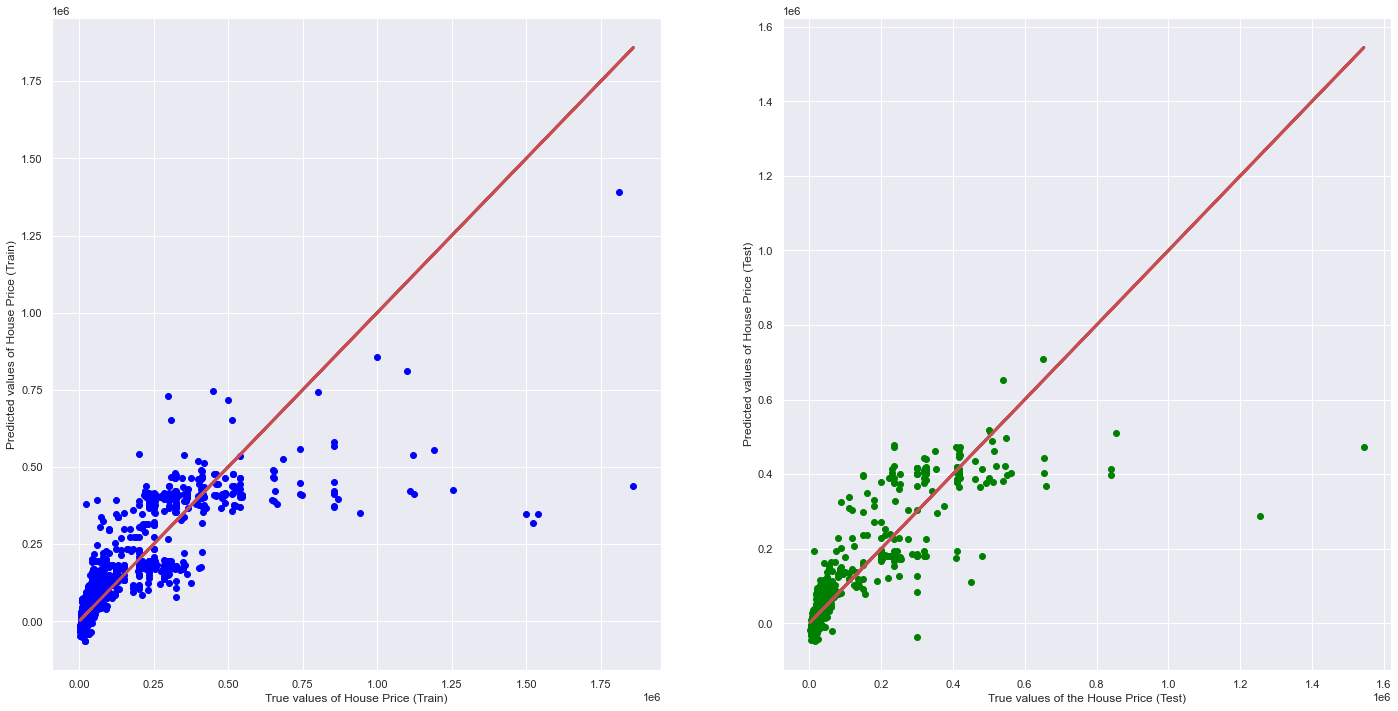

no test
Cross Validation:
R_squared values: [0.78635907 0.78627129 0.6211663  0.59012083 0.66703793 0.6334999
 0.65722598 0.747003   0.81534464 0.6975207 ]
R_squared mean: 0.70015496253952




In [32]:
# Applying linear regression model on all types of data, finding the MSE and R2 value
linear_reg(data_ohe_n,data_y_n,cross=1)
linear_reg(data_ohe,data_y,cross=1)
linear_reg(data_x_n,data_y_n,cross=1)
linear_reg(data_x,data_y,cross=1)

Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)


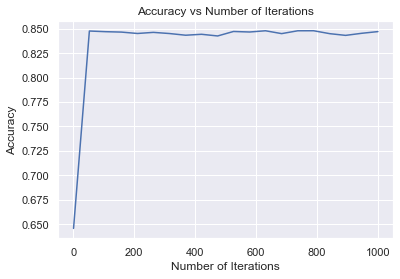

Random tree with number of iterations: 789
Accuracy: 0.8479358841023816
No test specified
Cross Validation:
R_squared values: [0.74380742 0.78429649 0.85230271 0.70193813 0.7694818  0.7553079
 0.78569059 0.77503655 0.8765883  0.85529949]
R_squared mean: 0.7899749365016862


Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)


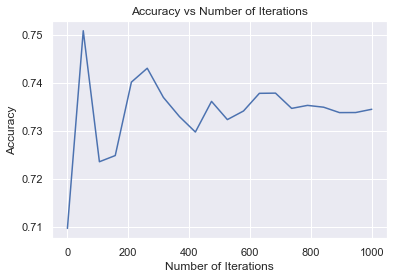

Random tree with number of iterations: 53
Accuracy: 0.7316237612039265
No test specified
Cross Validation:
R_squared values: [0.7436268  0.80614986 0.84102909 0.70932472 0.75762478 0.75101044
 0.80607354 0.77161621 0.88483572 0.84836746]
R_squared mean: 0.7919658607269576


Train Set Shape : (2229,) (2229, 4)
Test Set Shape : (744,) (744, 4)


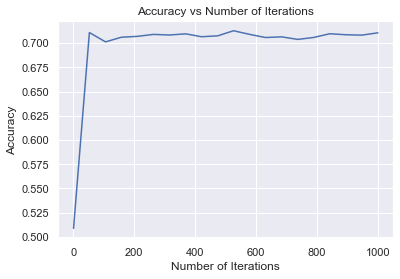

Random tree with number of iterations: 526
Accuracy: 0.7059821284647474
No test specified
Cross Validation:
R_squared values: [0.41584521 0.73185175 0.83690218 0.66395432 0.71011701 0.78995857
 0.82145168 0.76952422 0.83228426 0.83113758]
R_squared mean: 0.7403026781755637


Train Set Shape : (2229,) (2229, 4)
Test Set Shape : (744,) (744, 4)


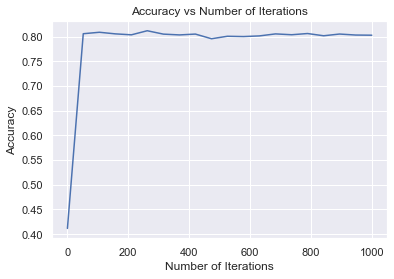

Random tree with number of iterations: 263
Accuracy: 0.8031787235526149
No test specified
Cross Validation:
R_squared values: [0.44985912 0.74284059 0.8345733  0.66368336 0.69638522 0.78658957
 0.82110139 0.76162904 0.83335805 0.83788594]
R_squared mean: 0.7427905574852454




In [33]:
# Applying random forest model on all types of data, finding the MSE and R2 value
randomforest(data_ohe_n,data_y_n,cross=1)
randomforest(data_ohe,data_y,cross=1)
randomforest(data_x_n,data_y_n,cross=1)
randomforest(data_x,data_y,cross=1)

Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.9173307636052155
Mean Squared Error (MSE) 	: 0.07845763309612977

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.7937427560005014
Mean Squared Error (MSE) 	: 0.2369699286989471



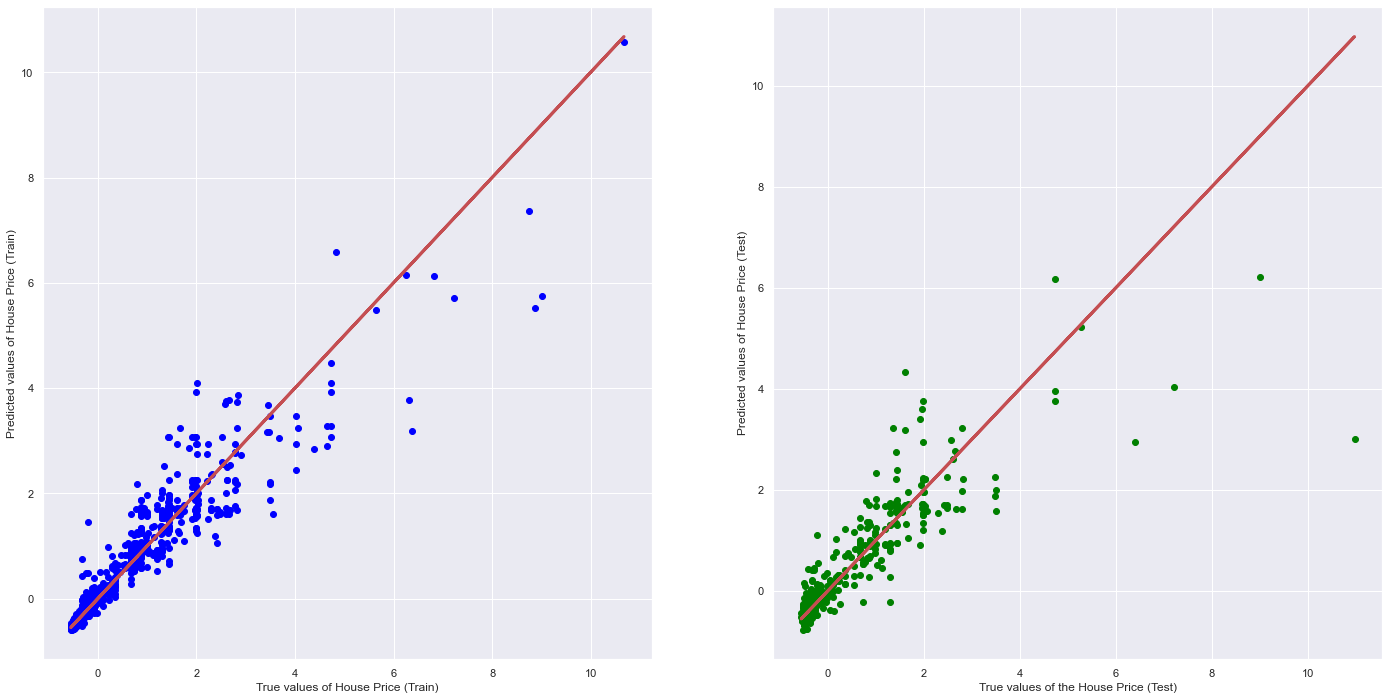

no test


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Cross Validation:
R_squared values: [0.80784732 0.732046   0.84490015 0.73352085 0.86729701 0.76763497
 0.76092029 0.84362055 0.85027211 0.80374406]
R_squared mean: 0.8011803306998985


Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.619638087743208
Mean Squared Error (MSE) 	: 9396391477.169317

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.6357037746934365
Mean Squared Error (MSE) 	: 10698117467.859331



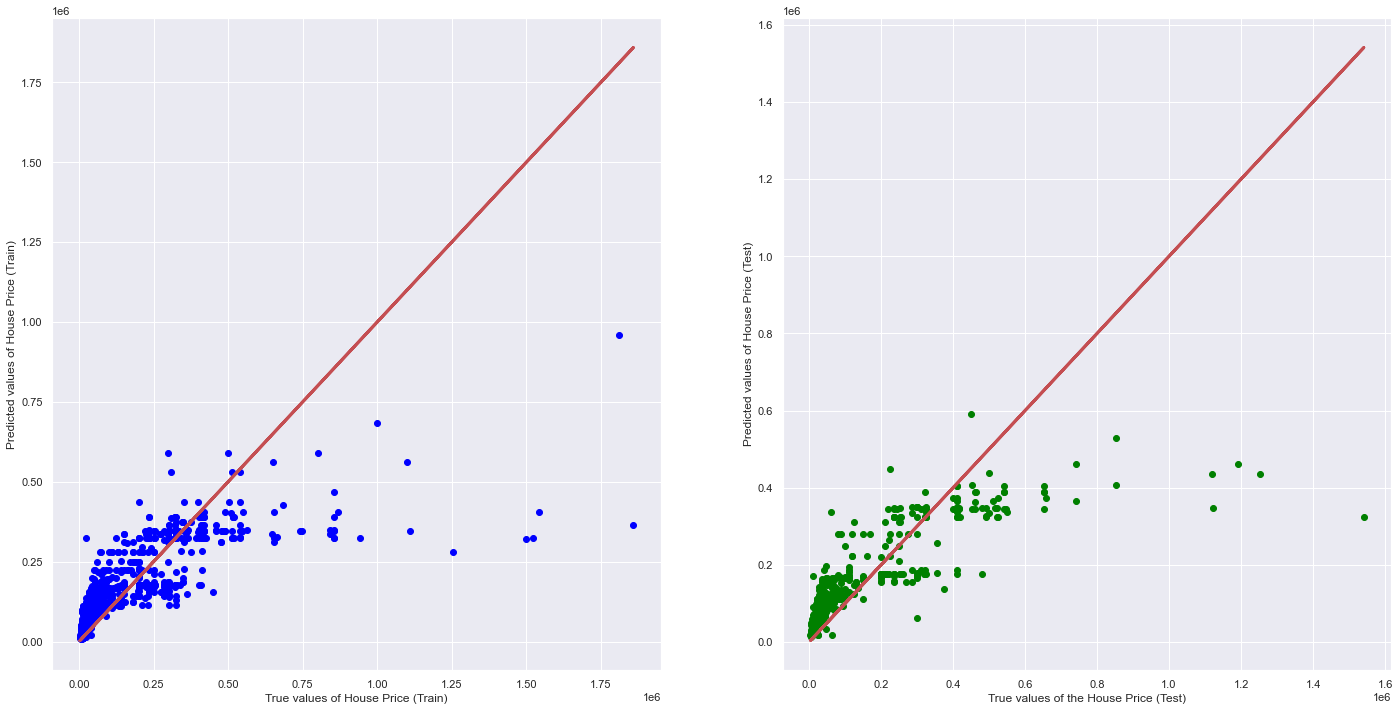

no test


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Cross Validation:
R_squared values: [0.68416054 0.72739427 0.59451654 0.52009127 0.60167578 0.58467795
 0.61836715 0.66945408 0.72598201 0.63269571]
R_squared mean: 0.6359015322413499


Train Set Shape : (2229,) (2229, 4)
Test Set Shape : (744,) (744, 4)


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.7489310464927856
Mean Squared Error (MSE) 	: 0.2703232778394623

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.8007291528504665
Mean Squared Error (MSE) 	: 0.15275762167195686



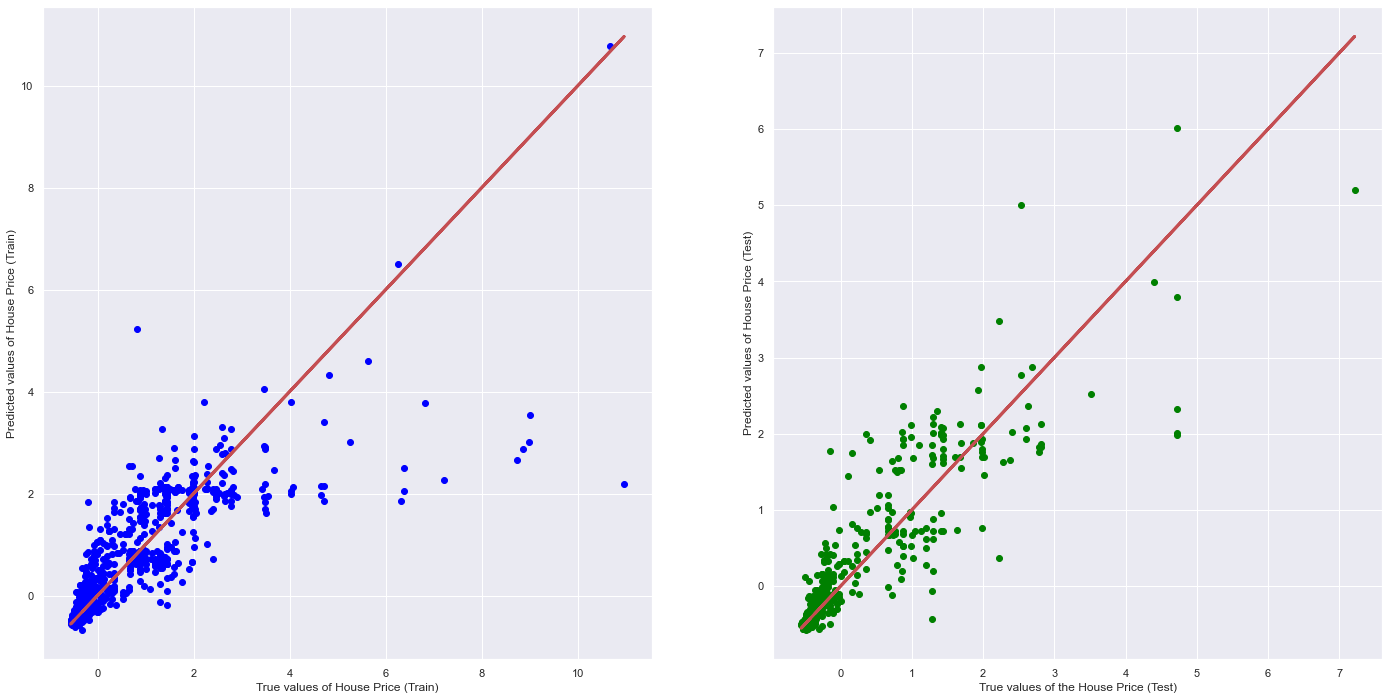

no test


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Cross Validation:
R_squared values: [0.82024551 0.61545863 0.81104456 0.60927777 0.74787262 0.69080431
 0.70110293 0.78774821 0.85154035 0.7704059 ]
R_squared mean: 0.7405500784247637


Train Set Shape : (2229,) (2229, 4)
Test Set Shape : (744,) (744, 4)


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.6052979186765595
Mean Squared Error (MSE) 	: 11060079120.4574

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.7048742391499718
Mean Squared Error (MSE) 	: 5777176891.572509



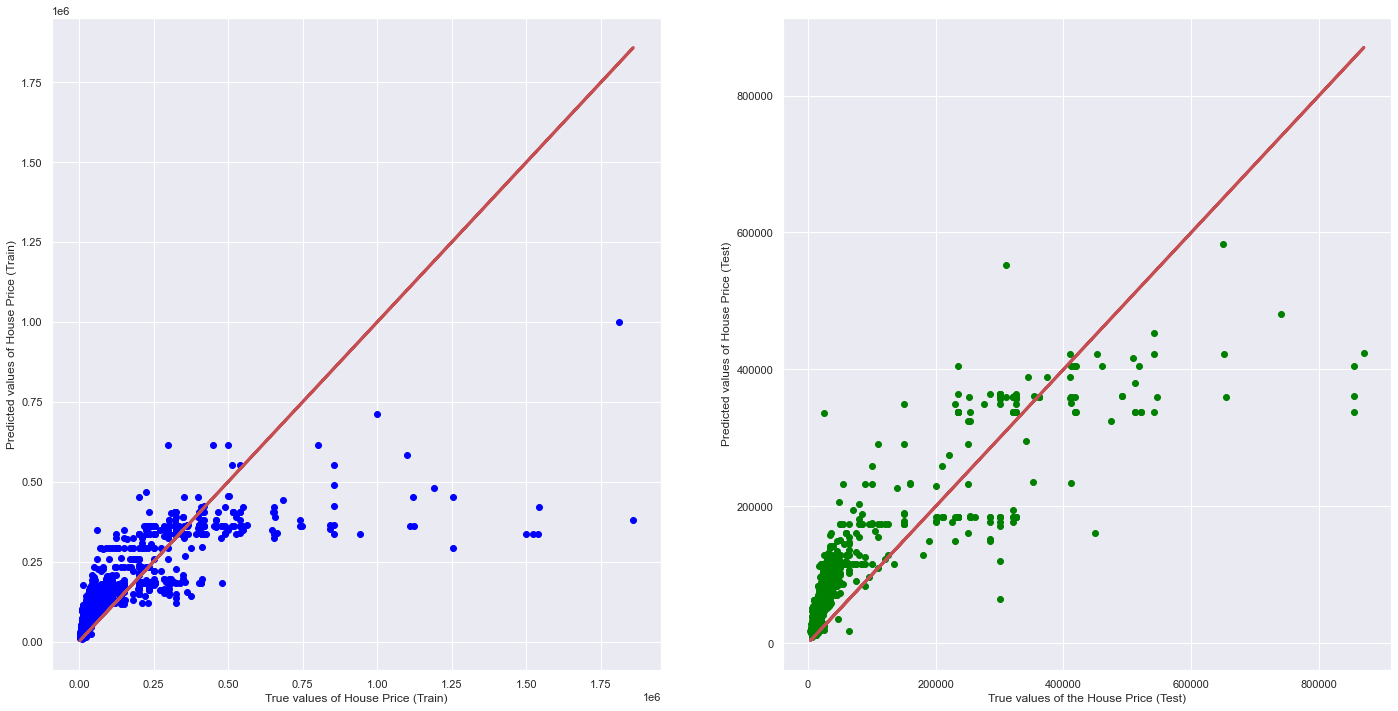

no test


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Cross Validation:
R_squared values: [0.68212711 0.7278502  0.59363235 0.51916407 0.60074635 0.58465982
 0.61757425 0.66765201 0.72441877 0.63254039]
R_squared mean: 0.6350365310380282




/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
# Applying neural network model on all types of data, finding the MSE and R2 value
neural(data_ohe_n,data_y_n,cross=1)
neural(data_ohe,data_y,cross=1)
neural(data_x_n,data_y_n,cross=1)
neural(data_x,data_y,cross=1)

Based on the predictive model R squared value, which is a measure of accuracy, the neural network and random forest for normalized, one hot encoded data are clear winners as well as non-normalized random forest. These models will be used to predict monthly rent price for two properties my parents own in Delhi (index 0 is in Pitampura, and index 1 is in Dwarka), with actual rent prices of [27500, 20000]. Let's see the accuracy of the models. 

In [35]:
# Copying the columns of original dataset to ensure that shape and columns align for prediction. 
my_list = data_ohe.columns.values.tolist()
my_list=my_list[4:]
a=data_ohe_n.shape[1]-4
a=int(a)
zero1 = np.zeros(shape=(2, 4))
zero2= np.zeros(shape=(2, a))
df = pd.DataFrame(zero1, columns = ['Area','No. of Bedrooms','No. of Bathrooms','Distance'])
dfrest=pd.DataFrame(zero2, columns = my_list)
df['Area'][0]=1000
df['No. of Bathrooms'][0]=2
df['No. of Bedrooms'][0]=3
df['Distance'][0]= 14.015196
df['Area'][1]=927
df['No. of Bathrooms'][1]=1
df['No. of Bedrooms'][1]=2
df['Distance'][1]= 10.173493
df_n=df.copy()

# Creating a normalized dataframe 
df_n=(df_n-meanx)/stdevx
dfrest['Status_Unfurnished'][0]= 1
dfrest['Location_Pitampura'][0]= 1
dfrest['Status_Unfurnished'][1]= 1
dfrest['Location_Sector 9 Dwarka'][1]= 1

# One hot encoding
df_ohe=pd.concat([df,dfrest],axis=1)
df
df_ohe_n=pd.concat([df_n,dfrest],axis=1)
df

,Area,No. of Bedrooms,No. of Bathrooms,Distance
0,1000.0,3.0,2.0,14.015196
1,927.0,2.0,1.0,10.173493


Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)
Summary statistics	Train Dataset:
Explained Variance (R^2) 	: 0.8885697523436199
Mean Squared Error (MSE) 	: 0.10943599548821022

Summary Statistics 	Test Dataset
Explained Variance (R^2) 	: 0.8394276632901387
Mean Squared Error (MSE) 	: 0.1687001837720519



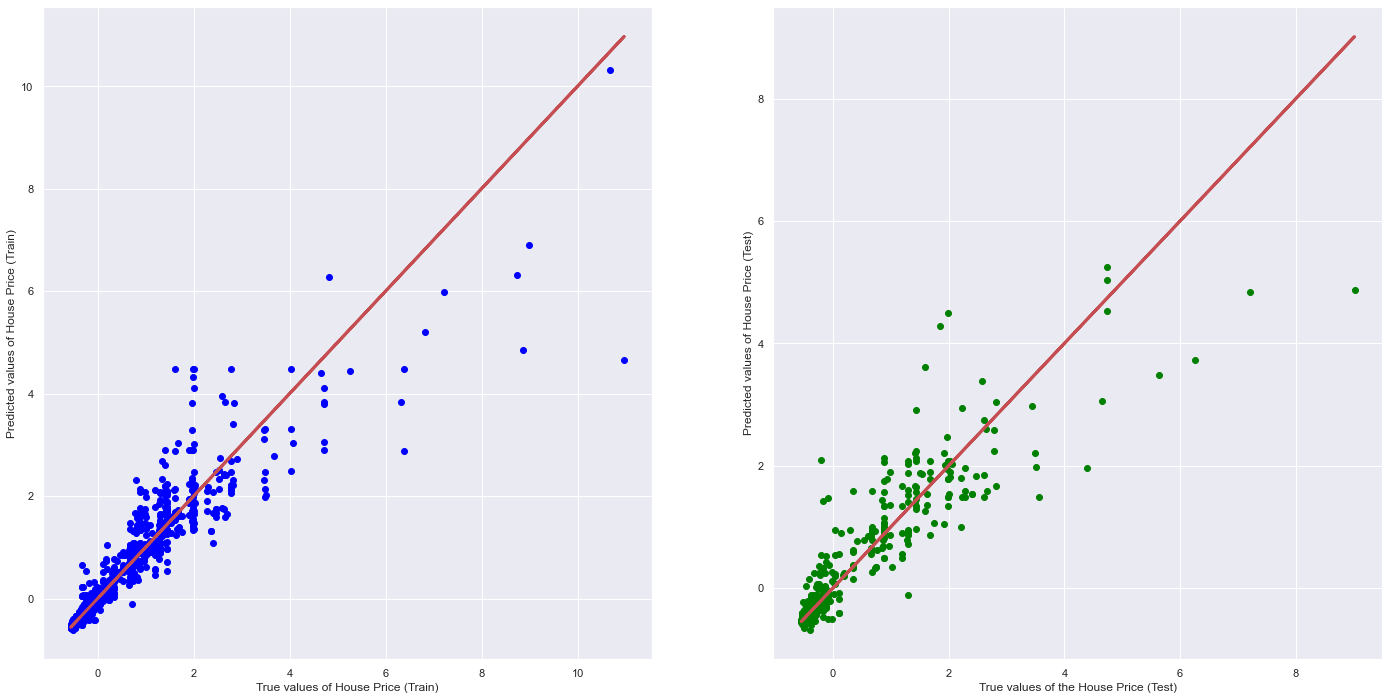

Predicted House Price is: [-0.36524941 -0.42421287]


/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/miniconda3/envs/CE9010_2021/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Cross Validation:
R_squared values: [0.82537809 0.77637745 0.8834155  0.7356874  0.86939492 0.7712449
 0.74572437 0.87144398 0.86650902 0.82046397]
R_squared mean: 0.8165639592298042


Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)


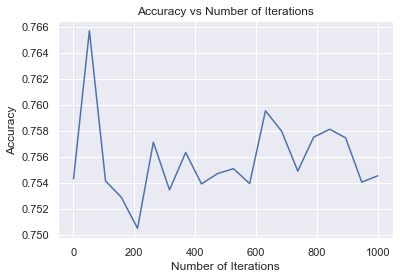

Random tree with number of iterations: 53
Accuracy: 0.7479919883706484
Predicted House Price is: [-0.44806872 -0.46955577]
Cross Validation:
R_squared values: [0.75040264 0.78146515 0.84801595 0.69844187 0.76622481 0.75938509
 0.78305862 0.79156919 0.85805034 0.84181091]
R_squared mean: 0.787842457012391


Train Set Shape : (2229,) (2229, 227)
Test Set Shape : (744,) (744, 227)


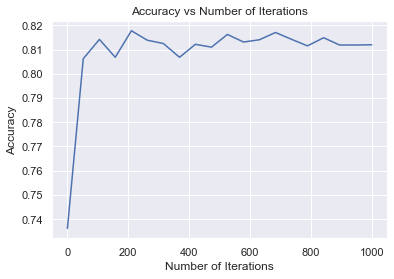

Random tree with number of iterations: 211
Accuracy: 0.8050902837718741
Predicted House Price is: [24061.29541864 16925.40758294]
Cross Validation:
R_squared values: [0.73201515 0.79195893 0.84607834 0.69701663 0.76430086 0.74786548
 0.78324345 0.78164607 0.87468549 0.8496365 ]
R_squared mean: 0.7868446906565463




In [36]:
# Testing the promising predictive models
neural(data_ohe_n,data_y_n,df_ohe_n)
randomforest(data_ohe_n,data_y_n,df_ohe_n)
randomforest(data_ohe,data_y,df_ohe)

According to results, the normalized random forest prediction with one hot encoding is nearest to the actual values, with accuracy of 93% and 96%. The non-normalized dataset is quite close also. However, the neural network fails to predict accurately. In fact, it predicts the second house should have higher rent, which is wrong. The winner here is the random forest technique. 

In [38]:
#To convert normalized data back to real data
def normtoreal(var):
    return var*stdevy+meany
print("Normalized Random Forest Prediction:")
print(normtoreal(-0.44806872))
print(normtoreal(-0.46955577))
print("Non-Normalized Random Forest Prediction:")
print("24061.29541864")
print("16925.40758294")
print("Normalized Neural Network Prediction:")
print(normtoreal(-0.36524941))
print(normtoreal(-0.42421287))

Normalized Random Forest Prediction:
20874.21340097375
17415.094133646402
Non-Normalized Random Forest Prediction:
24061.29541864
16925.40758294
Normalized Neural Network Prediction:
34206.98225140953
24714.676860288586


Areas for improvement:

1) Data Acquisition: Detailed information about nearby amenities such as convenience stores, schools and hospitals would greatly affect prices. In addition, Delhi is very densely populated so perhaps comparing every house to a single location would not be beneficial. Every city is different and unlike Singapore and European countries, Delhi doesn't have a "city centre" because there are several such commercial areas and business areas because of the population size and distribution. Indeed, house rent prediction is very complex and more variables such as the condition of house, the safety of the location, whether a deposit is required or not, will affect the price. In this particular dataset, the location data is slightly biased because the same amount of houses are not available in every location so prediction for certain locations may be better. For example, out of over 3,000 data points,less than 15 data points give information about houses in Dwarka, which is one of the locations we used to test the model (index 1). The best way to fix this problem would be to gather more data, though this increases the computation time. 

2) Other models such as Ridge and Logistic regression could be used for prediction. Other tools such as keras neural network could be used and regularized for greater generalization.